In [1]:
# packages
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
from IPython.display import display, HTML
pd.set_option('display.max_columns', None)
pd.options.display.max_seq_items = 2000
pd.options.display.max_rows = 999
display(HTML("<style>.container {width:90% !important;}</style>"))
sys.path.append("/Users/mariapalafox/Desktop/Toolbox")
from all_funx import *
from maplib import *

# PERMUTATION TEST IN R: mean diff of GRCh37 and 38 regional, conservation, and mutation density variables

**MERGE file has CADD columns specific to each assembly, comparing these values for same set of detected coordinates**

## using merge of 37 + 38 CADD model columns that represent differences
```python
keepmedet = ['pos_id19', 'pos_id38', 'pos_ID', 'CADD_phred_hg38', 'CADD_phred_hg19','GC_hg19', 'CpG_hg19', 'priPhCons_hg19',
       'mamPhCons_hg19', 'verPhCons_hg19', 'priPhyloP_hg19', 'mamPhyloP_hg19',
       'verPhyloP_hg19', 'GerpRS_hg19', 'GerpRSpval_hg19', 'GerpN_hg19',
       'GerpS_hg19', 'Dist2Mutation_hg19', 'Freq100bp_hg19', 'Rare100bp_hg19',
       'Sngl100bp_hg19', 'Freq1000bp_hg19', 'Rare1000bp_hg19',
       'Sngl1000bp_hg19', 'Freq10000bp_hg19', 'Rare10000bp_hg19',
       'Sngl10000bp_hg19', 'GC_hg38',
       'CpG_hg38', 'priPhCons_hg38', 'mamPhCons_hg38', 'verPhCons_hg38',
       'priPhyloP_hg38', 'mamPhyloP_hg38', 'verPhyloP_hg38', 'GerpRS_hg38',
       'GerpRSpval_hg38', 'GerpN_hg38', 'GerpS_hg38', 'Dist2Mutation_hg38',
       'Freq100bp_hg38', 'Rare100bp_hg38', 'Sngl100bp_hg38', 'Freq1000bp_hg38',
       'Rare1000bp_hg38', 'Sngl1000bp_hg38', 'Freq10000bp_hg38',
       'Rare10000bp_hg38', 'Sngl10000bp_hg38']
```
- do i need to do this at the residue-level to reduce redundancy
- taking average over positions? mean difference then permutation test between groups

MERGE_COMBO_cadd38corrected_1327386.csv

*make into permutation test in R and have histogram with addline as plots....mean difference represented *

- what annotations are DNA level and what annotations are RESIDUE LEVEL???

(redundancy concern)

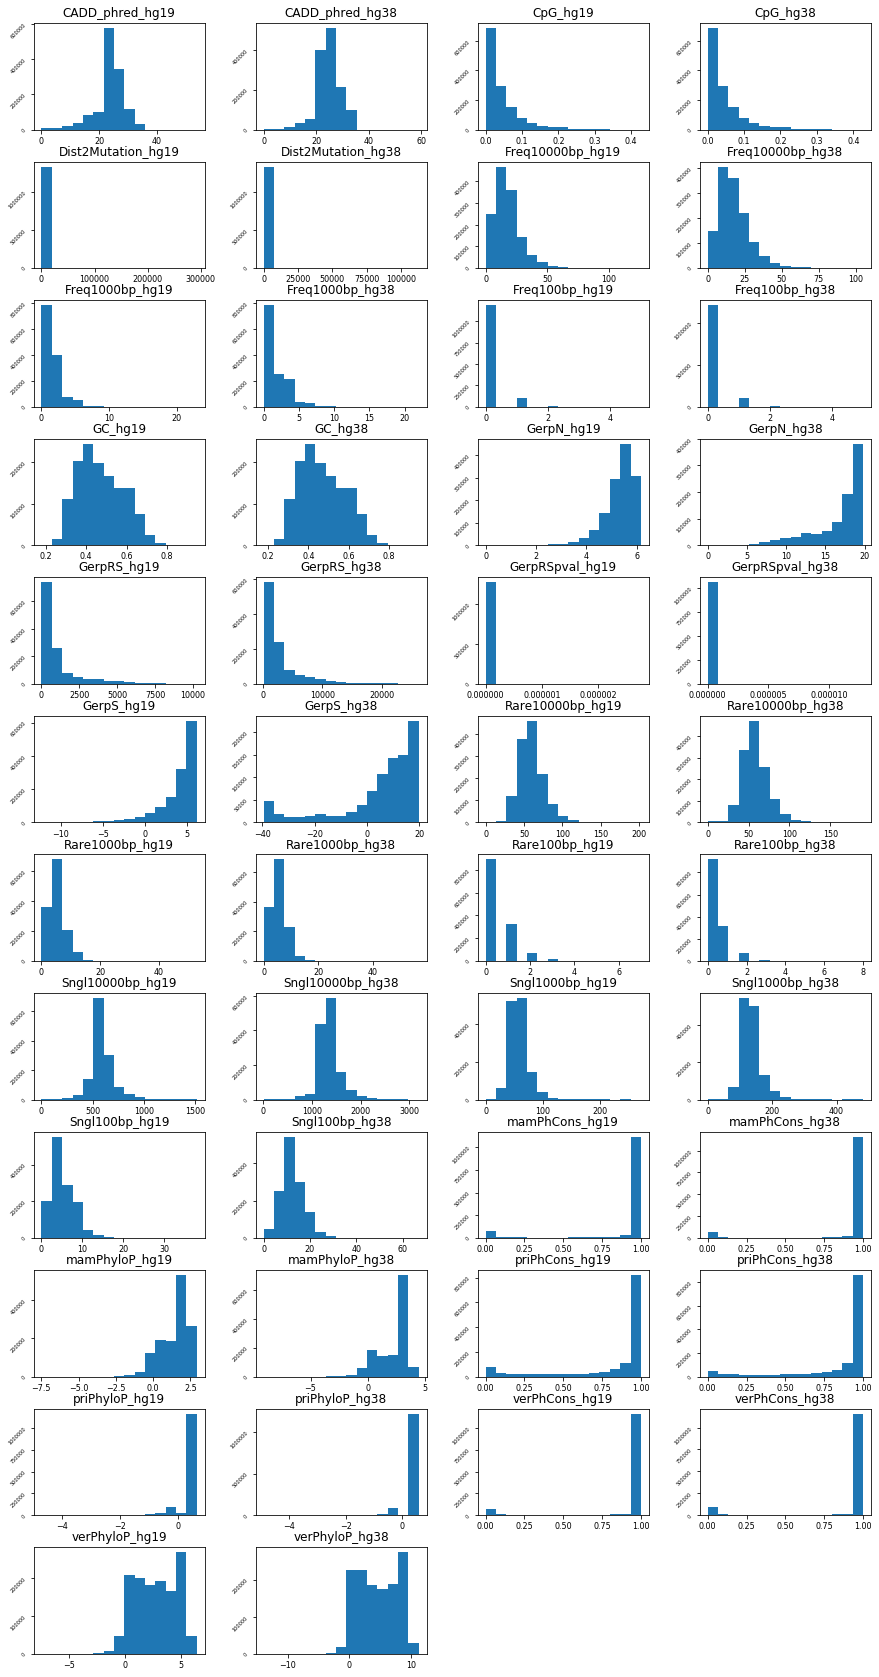

In [79]:
pd.options.display.float_format = '{:.4f}'.format
combo.hist(figsize=(15,30), layout=(12,4), grid=False, yrot=45, ylabelsize=5, xlabelsize=8, bins=15)
plt.savefig('COMBO_col_histogramgrid_notnormal.png')
plt.show()

combodescribe = combo.describe()
combodescribe.to_csv("MERGE_COMBO_DESCRIBE.csv")

# data is not normally distributed and does not have equal variance for all columns- 
options of using WILCOX or WELCH


<https://stats.stackexchange.com/questions/305/when-conducting-a-t-test-why-would-one-prefer-to-assume-or-test-for-equal-vari>
The second (older) recommendation is from Coombs et al. (1996, p. 148): "In summary, the independent samples t test is generally acceptable in terms of controlling Type I error rates provided there are sufficiently large equal-sized samples, even when the equal population variance assumption is violated. **For unequal-sized samples, however, an alternative that does not assume equal population variances is preferable.** Use the James second-order test when distributions are either short-tailed symmetric or normal. **Promising alternatives include the Wilcox H and Yuen trimmed means tests, which provide broader control of Type I error rates than either the Welch test or the James test and have greater power when data are long-tailed."**

> Coombs WT, Algina J, Oltman D. 1996. Univariate and multivariate omnibus hypothesis tests selected to control type I error rates when population variances are not necessarily equal. Rev Educ Res 66:137–79.

### scipy.stats.wilcoxon is the non parametric version of paired T test so not using becuase hg19 and hg38 are independent

### Welch T test from wiki:
<https://en.m.wikipedia.org/wiki/Welch%27s_t-test>
Welch's t-test, or unequal variances t-test, is a two-sample location test which is used to test the hypothesis that two populations have equal means. It is named for its creator, Bernard Lewis Welch, and is an adaptation of Student's t-test,[1] and is more reliable when the two samples have unequal variances and/or unequal sample sizes.

In [ ]:
scipy.stats.ttest_ind(a, b, axis=0, equal_var=False)

In [70]:
phred38 = combo.CADD_phred_hg38
phred19 = combo.CADD_phred_hg19
scipy.stats.ttest_ind(phred38, phred19, equal_var=True)

Ttest_indResult(statistic=196.91757457180896, pvalue=0.0)

```python
# correct cadd38 scores from dbnsfp
notcadd = pd.read_csv("CADD38_raw_phred_fromdbNSFP_notdetected.csv")
detcadd = pd.read_csv("CADD38_raw_phred_fromdbNSFP_detected.csv")


# SAVING CORRECTED FILES WITH CADD38 RAW AND PHRED SCORES
det2.to_csv("MERGE_dbNSFP_CADD_DETECTED_CK_104475_fixednullcadd38.csv", index=False)
notdet2.to_csv("MERGE_dbNSFP_CADD_NOT_DETECTED_CK_1222911_fixednullcadd38.csv", index=False)
```

---
---
---

# visualization of score correlation

In [3]:
from pandas import DataFrame
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
sn.set()
# add to packages sublime
os.chdir("/Users/mariapalafox/Box Sync/CODE_DATA/dir_MAPpaper/CADDmapped/ALL_CONSEQUENCES")

In [91]:
poscombo= pd.read_csv("/Users/mariapalafox/Box Sync/CODE_DATA/dir_MAPpaper/CADDmapped/Rodds_AAlevel_max_mean_combo_14925D_174702NOT.csv", low_memory=False)
describeMe(poscombo)

(189627, 11)
Index(['pos_ID', 'CADD_phred_hg38_mean', 'CADD_phred_hg38_max',
       'CADD_phred_hg19_mean', 'CADD_phred_hg19_max', 'DANN_score_mean',
       'DANN_score_max', 'fathmm-MKL_coding_score_mean',
       'fathmm-MKL_coding_score_max', 'group', 'AAgroup'],
      dtype='object')
pos_ID                          0
CADD_phred_hg38_mean            0
CADD_phred_hg38_max             0
CADD_phred_hg19_mean            0
CADD_phred_hg19_max             0
DANN_score_mean                 0
DANN_score_max                  0
fathmm-MKL_coding_score_mean    0
fathmm-MKL_coding_score_max     0
group                           0
AAgroup                         0
dtype: int64


In [102]:
cdetected = poscombo.loc[(poscombo['group'] == 'detected') & (poscombo['AAgroup'] == 'C')]
kdetected = poscombo.loc[(poscombo['group'] == 'detected') & (poscombo['AAgroup'] == 'K')]
cnotdetected = poscombo.loc[(poscombo['group'] == 'notdetected') & (poscombo['AAgroup'] == 'C')]
knotdetected = poscombo.loc[(poscombo['group'] == 'notdetected') & (poscombo['AAgroup'] == 'K')]

In [103]:
print(cdetected.shape)
print(kdetected.shape)
print(cnotdetected.shape)
print(knotdetected.shape)

(6057, 11)
(8868, 11)
(34050, 11)
(140652, 11)


In [117]:
# function for making spearman heat maps
def make_corr_heat(df, savename):
    corr = df.corr(method='spearman')
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    with sn.axes_style("white"):
        f, ax = plt.subplots(figsize=(7, 5))
        ax =sn.heatmap(corr, annot=True, annot_kws={"size": 6},vmin=0, vmax=1, mask=mask, square=True, cmap="PuBu")
        plt.subplots_adjust(top=1, bottom=0.5)
        #ax.set_ylim(len(8)-0.5, -0.5)
        # fix for mpl bug that cuts off top/bottom of seaborn viz
        b, t = plt.ylim() # discover the values for bottom and top
        b += 0.5 # Add 0.5 to the bottom
        t -= 0.5 # Subtract 0.5 from the top
        plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.savefig(savename, dpi=300, bbox_inches = "tight")
    plt.show()

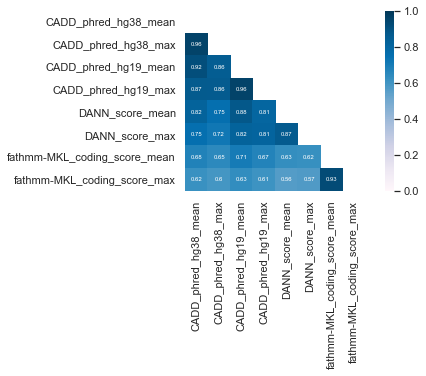

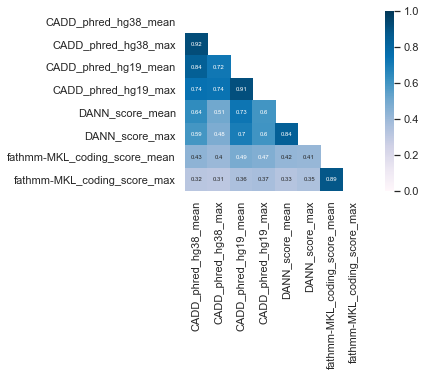

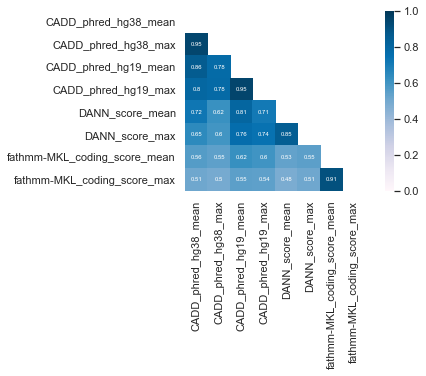

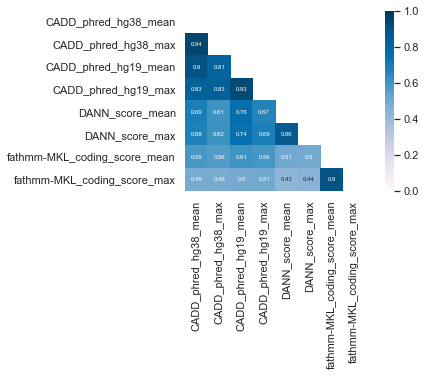

In [118]:
dfs = [cdetected, kdetected, cnotdetected, knotdetected]
dfnames = ['corr_cdetected_6057_MLscores.pdf', 'corr_kdetected_8868_MLscores.pdf', 'corr_cnotdetected_34050_MLscores.pdf', 'corr_knotdetected_140652_MLscores.pdf']
for x,y in zip(dfs, dfnames):
    make_corr_heat(x, y)

# Version at DNA level, not mean of codons,  not grouped by amino acid position
## K > E
## C > W 
### panel 4 followed by odds ratio of all detected vs all non detected
- similar results to max scores at 14k positions for detected

In [124]:
os.chdir("/Users/mariapalafox/Box Sync/CODE_DATA/dir_MAPpaper/CADDmapped/ALL_CONSEQUENCES/")
combo = pd.read_csv("MERGE_COMBO_cadd38corrected_1327386.csv")

/Users/mariapalafox/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [125]:
combo

,Unnamed: 0,pos_id19,pos_id38,pos_ID,matched_UKBID,matched_aapos,Amino_acids,aaref,aaalt,CADD_phred_hg38,CADD_phred_hg19,CADDdiff_38minus19,M-CAP_score,M-CAP_rankscore,M-CAP_pred,REVEL_score,REVEL_rankscore,MPC_score,MPC_rankscore,PrimateAI_score,PrimateAI_rankscore,PrimateAI_pred,DANN_score,DANN_rankscore,fathmm-MKL_coding_score,fathmm-MKL_coding_rankscore,fathmm-MKL_coding_pred,fathmm-MKL_coding_group,RawScore_hg19,CADD38_raw,GROUP
0,0,10_000093270_A_C,10_000047330_A_C,Q3ZCM7_C354,Q3ZCM7,354,Cys/Trp,C,W,22.6000,22.3000,0.3000,0.0206,0.4323,T,0.4370,0.7445,nan,nan,0.7692,0.7730,T,0.8515,0.1572,0.1928,0.2060,N,AEFBI,2.3817,2.7942,detected
1,1,10_000093271_C_A,10_000047331_C_A,Q3ZCM7_C354,Q3ZCM7,354,Cys/Phe,C,F,22.6000,21.8000,0.8000,0.0160,0.3698,T,0.3740,0.6959,nan,nan,0.7279,0.7120,T,0.8959,0.1893,0.5791,0.3050,D,AEFBI,2.2671,2.8141,detected
2,2,10_000093271_C_G,10_000047331_C_G,Q3ZCM7_C354,Q3ZCM7,354,Cys/Ser,C,S,22.4000,19.6700,2.7300,0.0223,0.4523,T,0.3770,0.6985,nan,nan,0.7132,0.6905,T,0.7990,0.1295,0.5948,0.3093,D,AEFBI,2.0451,2.6972,detected
3,3,10_000093271_C_T,10_000047331_C_T,Q3ZCM7_C354,Q3ZCM7,354,Cys/Tyr,C,Y,22.5000,21.4000,1.1000,0.0143,0.3431,T,0.3690,0.6917,nan,nan,0.7893,0.8033,T,0.7203,0.0983,0.5103,0.2880,D,AEFBI,2.2059,2.7589,detected
4,4,10_000093272_A_C,10_000047332_A_C,Q3ZCM7_C354,Q3ZCM7,354,Cys/Gly,C,G,23.2000,20.7000,2.5000,0.0303,0.5265,D,0.3950,0.7131,nan,nan,0.7005,0.6722,T,0.6156,0.0674,0.6311,0.3199,D,AEFBI,2.1385,3.0903,detected
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1327381,1327381,Y_022749935_A_C,Y_020588049_A_C,O14602_K94,O14602,94,Lys/Thr,K,T,24.7000,23.8000,0.9000,0.0153,0.3597,T,nan,nan,1.0435,0.7588,nan,nan,NaN,0.9971,0.8094,0.6713,0.3332,D,AE,3.0725,3.6301,notdetected
1327382,1327382,Y_022749935_A_G,Y_020588049_A_G,O14602_K94,O14602,94,Lys/Arg,K,R,22.2000,18.6500,3.5500,0.0571,0.6686,D,nan,nan,0.5570,0.5233,nan,nan,NaN,0.9966,0.7795,0.6532,0.3270,D,AE,1.9425,2.5888,notdetected
1327383,1327383,Y_022749935_A_T,Y_020588049_A_T,O14602_K94,O14602,94,Lys/Met,K,M,25.1000,24.1000,1.0000,0.0284,0.5112,D,nan,nan,1.0979,0.7763,nan,nan,NaN,0.9938,0.6189,0.6540,0.3272,D,AE,3.1929,3.7306,notdetected
1327384,1327384,Y_022749936_G_C,Y_020588050_G_C,O14602_K94,O14602,94,Lys/Asn,K,N,24.1000,23.7000,0.4000,0.0338,0.5523,D,nan,nan,1.0353,0.7557,nan,nan,NaN,0.9979,0.8793,0.3531,0.2527,N,AEF,3.0259,3.4440,notdetected


In [130]:
combo.dropna(inplace=True)
combo.drop(['Unnamed: 0'], axis=1,inplace=True)
combo

,pos_id19,pos_id38,pos_ID,matched_UKBID,matched_aapos,Amino_acids,aaref,aaalt,CADD_phred_hg38,CADD_phred_hg19,CADDdiff_38minus19,M-CAP_score,M-CAP_rankscore,M-CAP_pred,REVEL_score,REVEL_rankscore,MPC_score,MPC_rankscore,PrimateAI_score,PrimateAI_rankscore,PrimateAI_pred,DANN_score,DANN_rankscore,fathmm-MKL_coding_score,fathmm-MKL_coding_rankscore,fathmm-MKL_coding_pred,fathmm-MKL_coding_group,RawScore_hg19,CADD38_raw,GROUP
35,10_001046806_A_C,10_001000866_A_C,Q9BZE4_K282,Q9BZE4,282,Lys/Gln,K,Q,28.1000,33.0000,-4.9000,0.0272,0.5005,D,0.5830,0.8345,0.3549,0.3725,0.5720,0.4896,D,0.9951,0.6862,0.9927,0.9366,D,AEFDBHCI,4.4740,4.2515,detected
36,10_001046806_A_G,10_001000866_A_G,Q9BZE4_K282,Q9BZE4,282,Lys/Glu,K,E,28.8000,33.0000,-4.2000,0.0361,0.5676,D,0.6130,0.8506,0.4510,0.4486,0.6038,0.5345,D,0.9989,0.9667,0.9920,0.9271,D,AEFDBHCI,4.3564,4.3301,detected
37,10_001046807_A_C,10_001000867_A_C,Q9BZE4_K282,Q9BZE4,282,Lys/Thr,K,T,27.4000,33.0000,-5.6000,0.0173,0.3900,T,0.6930,0.8901,0.4824,0.4720,0.6108,0.5443,D,0.9980,0.8855,0.9938,0.9529,D,AEFDBHCI,4.4906,4.1655,detected
38,10_001046807_A_G,10_001000867_A_G,Q9BZE4_K282,Q9BZE4,282,Lys/Arg,K,R,27.3000,33.0000,-5.7000,0.0140,0.3382,T,0.4290,0.7388,0.2151,0.2405,0.5475,0.4551,D,0.9988,0.9589,0.9932,0.9441,D,AEFDBHCI,4.4840,4.1460,detected
39,10_001046807_A_T,10_001000867_A_T,Q9BZE4_K282,Q9BZE4,282,Lys/Met,K,M,28.3000,34.0000,-5.7000,0.0179,0.3973,T,0.6820,0.8850,0.5461,0.5162,0.5529,0.4627,D,0.9958,0.7274,0.9937,0.9509,D,AEFDBHCI,4.6363,4.2723,detected
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285136,9_139890982_T_A,9_136996530_T_A,O95833_K5,O95833,5,Lys/Met,K,M,25.9000,25.2000,0.7000,0.0357,0.5652,D,0.0910,0.2681,1.0272,0.7531,0.7015,0.6737,T,0.9898,0.4974,0.2959,0.2386,N,ALL,3.5208,3.9025,notdetected
1285137,9_139890982_T_C,9_136996530_T_C,O95833_K5,O95833,5,Lys/Arg,K,R,22.6000,22.2000,0.4000,0.0216,0.4436,T,0.0400,0.1082,0.4927,0.4790,0.6962,0.6660,T,0.9853,0.4257,0.2256,0.2179,N,ALL,2.3496,2.8321,notdetected
1285138,9_139890982_T_G,9_136996530_T_G,O95833_K5,O95833,5,Lys/Thr,K,T,23.7000,23.4000,0.3000,0.0195,0.4190,T,0.0540,0.1570,0.6827,0.6013,0.7544,0.7510,T,0.9825,0.3954,0.2823,0.2350,N,ALL,2.8724,3.3230,notdetected
1285139,9_139890983_T_C,9_136996531_T_C,O95833_K5,O95833,5,Lys/Glu,K,E,21.6000,17.7000,3.9000,0.0243,0.4732,T,0.0900,0.2654,0.8126,0.6681,0.7469,0.7399,T,0.8194,0.1394,0.1306,0.1764,N,ALL,1.8330,2.3530,notdetected


In [131]:
combo.to_csv("MERGE_COMBO_cadd38corrected_filternan_910115.csv", index=False)

In [22]:
print('difference post dropping missing values = ', 1327386-910115)
print('percent dropped of data from nan = ', (417271/1327386)*100)

difference post dropping missing values =  417271
percent dropped of data from nan =  31.43554324062481


# total missense in combo after dropping rows with missing values = 910,115
## diff [ all missense ] - [ only missense with all values ] = 417,271

In [135]:
# specific missense
CW = combo[combo['Amino_acids'] == 'Cys/Trp'].copy()
KE = combo[combo['Amino_acids'] == 'Lys/Glu'].copy()
CWdetected = CW[CW['GROUP'] == 'detected'].copy()
KEdetected = KE[KE['GROUP'] == 'detected'].copy()
CWnotdetected = CW[CW['GROUP'] == 'notdetected'].copy()
KEnotdetected = KE[KE['GROUP'] == 'notdetected'].copy()

print("cw detected shape: ", CWdetected.shape)
print("cw not det shape: ", CWnotdetected.shape)
print("ke detected shape: ", KEdetected.shape)
print("ke notdet shape: ", KEnotdetected.shape)
print()

Ccombo = combo[combo['aaref'] == 'C'].copy()
Kcombo = combo[combo['aaref'] == 'K'].copy()
Ccombo = Ccombo[Ccombo['GROUP'] == 'detected'].copy()
Kcombo = Kcombo[Kcombo['GROUP'] == 'detected'].copy()
      
print('all cys missense detected: ', Ccombo.shape)
print('all lys missense detected: ', Kcombo.shape)

cw detected shape:  (4209, 30)
cw not det shape:  (24042, 30)
ke detected shape:  (5979, 30)
ke notdet shape:  (95727, 30)

all cys missense detected:  (29541, 30)
all lys missense detected:  (41850, 30)


In [136]:
def make_corr(df):
    df = df[['M-CAP_score','REVEL_score', 
       'MPC_score', 'PrimateAI_score', 'DANN_score', 
       'fathmm-MKL_coding_score', 'RawScore_hg19',
       'CADD38_raw', 'GROUP']].copy()
# order by 37 group and 38 group
    colorder = ['RawScore_hg19', 'fathmm-MKL_coding_score',
            'M-CAP_score','REVEL_score', 'PrimateAI_score', 'MPC_score',  
            'DANN_score', 'CADD38_raw', 'GROUP']
# setting new col order
    df = df[colorder]
    df.columns = ['CADD37', 'fathmmMKL',
            'MCAP','REVEL', 'PrimateAI', 'MPC',  
            'DANN', 'CADD38', 'GROUP']
    return df

# scores scores for specific missense groups
KEplot_det = make_corr(KEdetected)
KEplot_not = make_corr(KEnotdetected)
CWplot_det = make_corr(CWdetected)
CWplot_not = make_corr(CWnotdetected)

# all missense at detected C or K codons, filtered out nan
Cplot = make_corr(Ccombo)
Kplot = make_corr(Kcombo)

# dropped missing values for MPC and other non-ML scores
### 2 versions of heatmap
- all missense at detected cys/lys
- CW or KE missense at detected or not detected 

from all missense cys and lys detected files, number of unique aa pos: 
- cysteine unique positions = 4227
- lysine unique positions = 5992

In [137]:
print(len(Ccombo.pos_ID.unique()))
print(len(Kcombo.pos_ID.unique()))
print('cys lost ' , 6057 - 4227)
print('lys lost ' , 8868 - 5992)
print("total missense : ")
print("detected cys missense: ", Ccombo.shape)
print("detected lys misssense: ", Kcombo.shape)

4227
5992
cys lost  1830
lys lost  2876
total missense : 
detected cys missense:  (29541, 30)
detected lys misssense:  (41850, 30)


In [138]:
29541+41850

71391

# USE spearman or kendall's tau if varibles being compared are not normally distributed

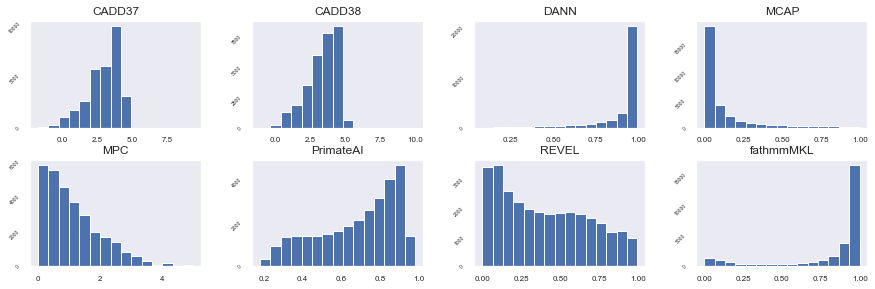

In [150]:
Cplot.describe()
pd.options.display.float_format = '{:.4f}'.format
Cplot.hist(figsize=(15,30), layout=(12,4), grid=False, yrot=45, ylabelsize=5, xlabelsize=8, bins=15)

plt.savefig('hist_detected_cys_missense_notnormal_4227aa_29541miss.png')
plt.show()

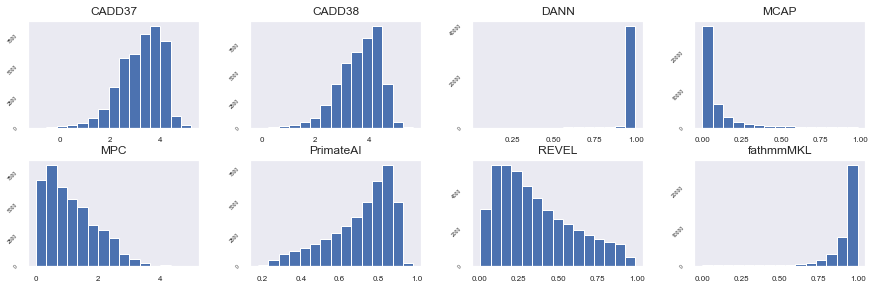

In [149]:
Kplot.describe()
pd.options.display.float_format = '{:.4f}'.format
Kplot.hist(figsize=(15,30), layout=(12,4), grid=False, yrot=45, ylabelsize=5, xlabelsize=8, bins=15)

plt.savefig('hist_detected_lys_missense_notnormal_5992aa_41850miss.png')
plt.show()

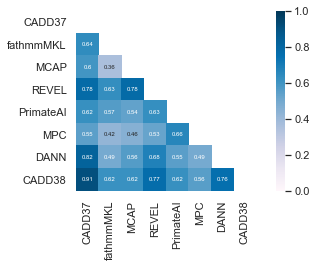

In [143]:
# Cysteine all missense detected no missing values
corr = Cplot.corr(method='spearman')
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sn.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax =sn.heatmap(corr, annot=True, annot_kws={"size": 6},vmin=0, vmax=1, mask=mask, square=True, cmap="PuBu")
    plt.subplots_adjust(top=1, bottom=0.5)
    #ax.set_ylim(len(8)-0.5, -0.5)
    # fix for mpl bug that cuts off top/bottom of seaborn viz
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values

#plt.show()
plt.savefig('corr_spearman_filterNAN_cys_DETECTED_4227aa_29541missense.pdf', dpi=300, bbox_inches = "tight")

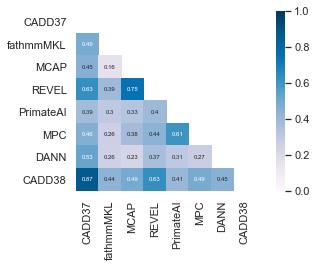

<Figure size 432x288 with 0 Axes>

In [144]:
# Lysine all missense detected no missing values
corr = Kplot.corr(method='spearman')
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sn.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax =sn.heatmap(corr, annot=True, annot_kws={"size": 6},vmin=0, vmax=1, mask=mask, square=True, cmap="PuBu")
    plt.subplots_adjust(top=1, bottom=0.5)
    #ax.set_ylim(len(8)-0.5, -0.5)
    # fix for mpl bug that cuts off top/bottom of seaborn viz
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values

plt.show()
plt.savefig('corr_spearman_filterNAN_lys_DETECTED_5992aa_41850missense.pdf', dpi=300, bbox_inches = "tight")

In [147]:
print("cw detected aa: ", len(CWdetected.pos_ID.unique()))
print("cw not det aa: ", len(CWnotdetected.pos_ID.unique()))
print("ke detected aa: ", len(KEdetected.pos_ID.unique()))
print("ke notdet aa: ", len(KEnotdetected.pos_ID.unique()))

cw detected aa:  4209
cw not det aa:  24042
ke detected aa:  5979
ke notdet aa:  95727


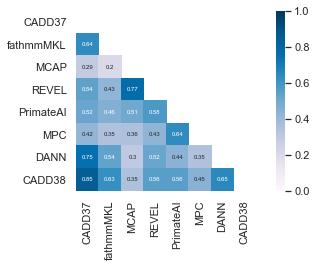

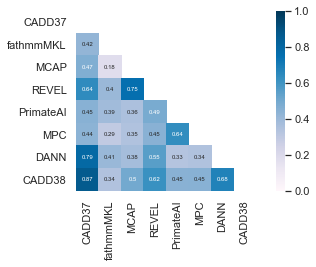

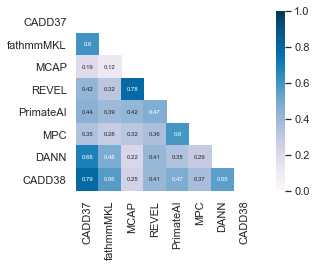

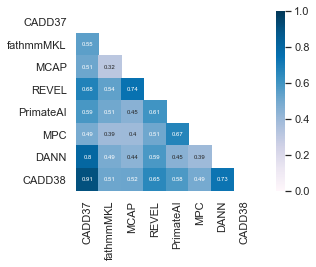

In [148]:
dfs = [CWplot_det, KEplot_det, CWplot_not, KEplot_not]
dfnames = ['corr_CWdetected_4209aa.pdf', 'corr_KEdetected_5979aa.pdf', 'corr_CWnotdet_24042aa.pdf', 'corr_KEnotdet_95727aa.pdf']
for x,y in zip(dfs, dfnames):
    make_corr_heat(x, y)

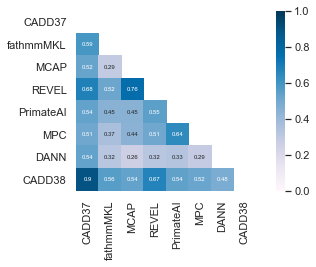

In [145]:
# all missense that had no missing value rows and overlap both det and not CK
# CADD raw scores being used NOT PHRED

corr = comboplot_nonull.corr(method='spearman')
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sn.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax =sn.heatmap(corr, annot=True, annot_kws={"size": 6},vmin=0, vmax=1, mask=mask, square=True, cmap="PuBu")
    plt.subplots_adjust(top=1, bottom=0.5)
    #ax.set_ylim(len(8)-0.5, -0.5)
    # fix for mpl bug that cuts off top/bottom of seaborn viz
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values

plt.savefig('correlation_filterNAN_allmissense_both_groups_910115.pdf', dpi=300, bbox_inches = "tight")
plt.show()
